[                       0%                       ]

⏳ Downloading data...


[*********************100%***********************]  93 of 93 completed


🚀 Optimizing portfolio...

✅ Optimal Portfolio Weights:
NVDA    0.1000
LLY     0.0681
MSTR    0.0319
NOC     0.0100
INTU    0.0100
         ...  
TMO     0.0100
SBUX    0.0100
HD      0.0100
PEP     0.0100
NKE     0.0100
Length: 83, dtype: float64


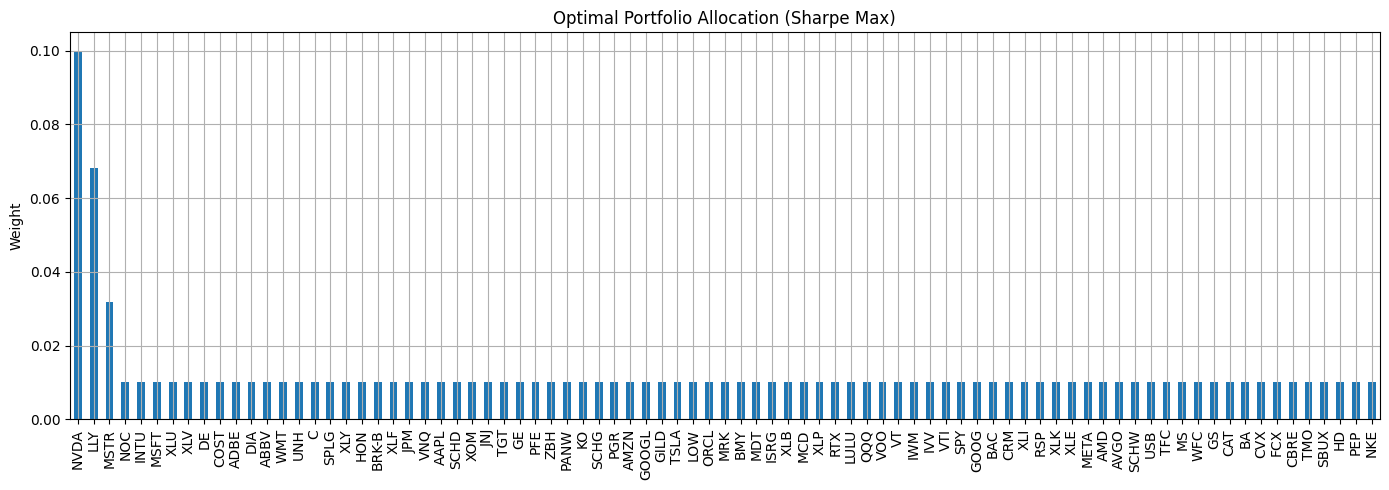


🔁 Backtesting against SPY...


C:\Users\chris\AppData\Local\Temp\ipykernel_5620\3757983861.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\chris\OneDrive\Desktop\PortfolioOptimization_V0.1\venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


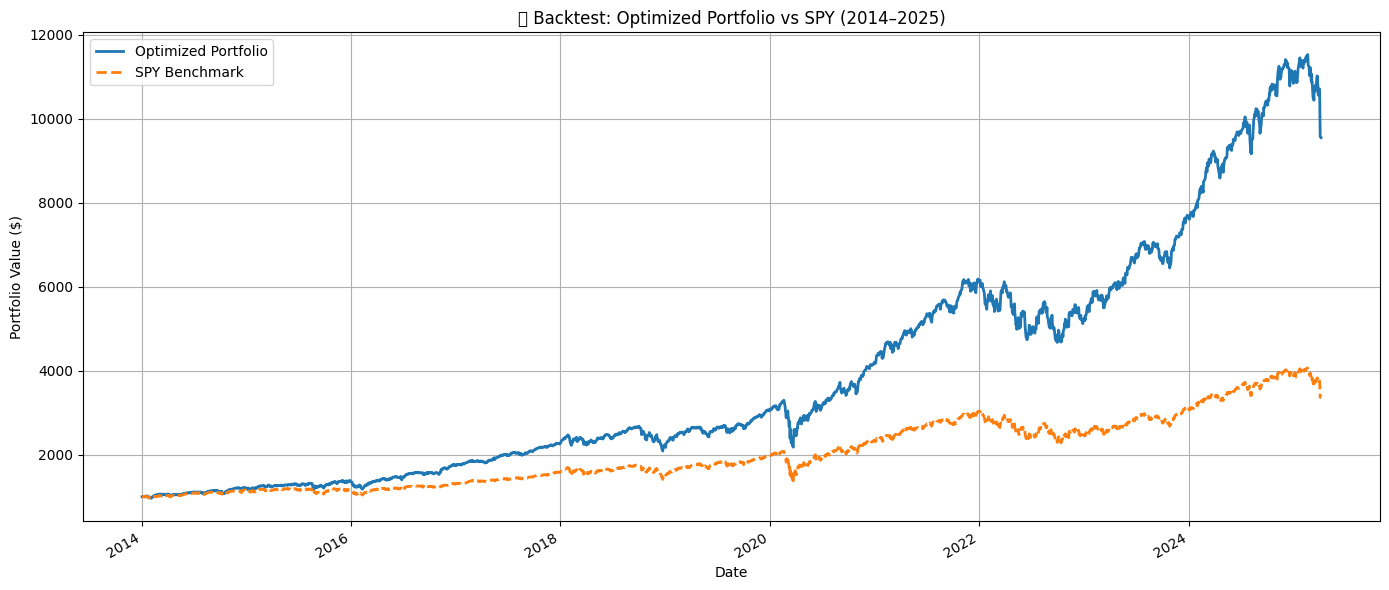

In [2]:
# 📦 Imports
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ✅ 100-Ticker Portfolio (including your university portfolio)
TICKERS = [
    "SCHD", "SWPPX", "SCHG", "QQQM", "PLTR", "MSTR", "SOFI", "MSFT", "BRK-B", "GOOG", "JPM", "MRK", "LULU", "UNH",
    "QQQ", "VTI", "SPY", "IVV", "DIA", "IWM", "VT", "VOO", "SPLG", "RSP",
    "XLF", "XLK", "XLY", "XLP", "XLV", "XLE", "XLU", "XLI", "XLB", "VNQ",
    "AAPL", "NVDA", "AMD", "META", "TSLA", "AMZN", "CRM", "GOOGL", "ORCL", "AVGO",
    "ADBE", "SNOW", "SHOP", "INTU", "PANW", "ZS", "NET", "COIN", "DOCU",
    "BAC", "WFC", "GS", "MS", "C", "TFC", "USB", "SCHW", "PGR", "CBRE",
    "BA", "CAT", "DE", "HON", "GE", "NOC", "RTX", "XOM", "CVX", "FCX",
    "PFE", "JNJ", "ABBV", "LLY", "BMY", "ZBH", "ISRG", "TMO", "MDT", "GILD",
    "WMT", "COST", "HD", "LOW", "TGT", "SBUX", "MCD", "KO", "PEP", "NKE"
]

# 📥 Download data (10+ years)
print("⏳ Downloading data...")
data = yf.download(TICKERS + ["SPY"], start="2014-01-01", end="2025-04-30", group_by='ticker', auto_adjust=True)

# 📊 Extract adjusted close
adj_close = pd.DataFrame()
for ticker in TICKERS:
    try:
        adj_close[ticker] = data[ticker]["Close"]
    except:
        continue
adj_close = adj_close.dropna(axis=1)

# 💹 Daily returns
returns = adj_close.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# ⚙️ Portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    ret = np.dot(weights, mean_returns)
    std = np.sqrt(weights.T @ cov_matrix @ weights)
    return ret, std

def negative_sharpe(weights, mean_returns, cov_matrix, rf=0.02):
    ret, std = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(ret - rf) / std

# 🎯 Constraints and bounds
num_assets = len(mean_returns)
init_guess = np.ones(num_assets) / num_assets
bounds = tuple((0.01, 0.10) for _ in range(num_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# 🚀 Run optimization
print("🚀 Optimizing portfolio...")
opt = minimize(negative_sharpe, init_guess,
               args=(mean_returns, cov_matrix),
               method='SLSQP', bounds=bounds, constraints=constraints)

# ✅ Optimal weights
opt_weights = pd.Series(opt.x, index=mean_returns.index)
opt_weights = opt_weights[opt_weights > 0.005].sort_values(ascending=False)
print("\n✅ Optimal Portfolio Weights:")
print(opt_weights.round(4))

# 📊 Allocation bar chart
opt_weights.plot(kind='bar', figsize=(14, 5), title="Optimal Portfolio Allocation (Sharpe Max)")
plt.ylabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 Backtest vs SPY
print("\n🔁 Backtesting against SPY...")
portfolio_returns = (returns[opt_weights.index] @ opt_weights).dropna()
spy_returns = data['SPY']['Close'].pct_change().reindex(portfolio_returns.index).dropna()

initial_value = 1000
portfolio_value = (1 + portfolio_returns).cumprod() * initial_value
spy_value = (1 + spy_returns).cumprod() * initial_value

plt.figure(figsize=(14, 6))
portfolio_value.plot(label="Optimized Portfolio", linewidth=2)
spy_value.plot(label="SPY Benchmark", linestyle="--", linewidth=2)
plt.title("📈 Backtest: Optimized Portfolio vs SPY (2014–2025)")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


⏳ Downloading data...


[*********************100%***********************]  93 of 93 completed


🚀 Optimizing portfolio...

✅ Optimal Portfolio Weights:
NVDA    0.1000
LLY     0.0681
MSTR    0.0319
FCX     0.0100
TFC     0.0100
         ...  
HD      0.0100
TGT     0.0100
MCD     0.0100
KO      0.0100
PEP     0.0100
Length: 83, dtype: float64


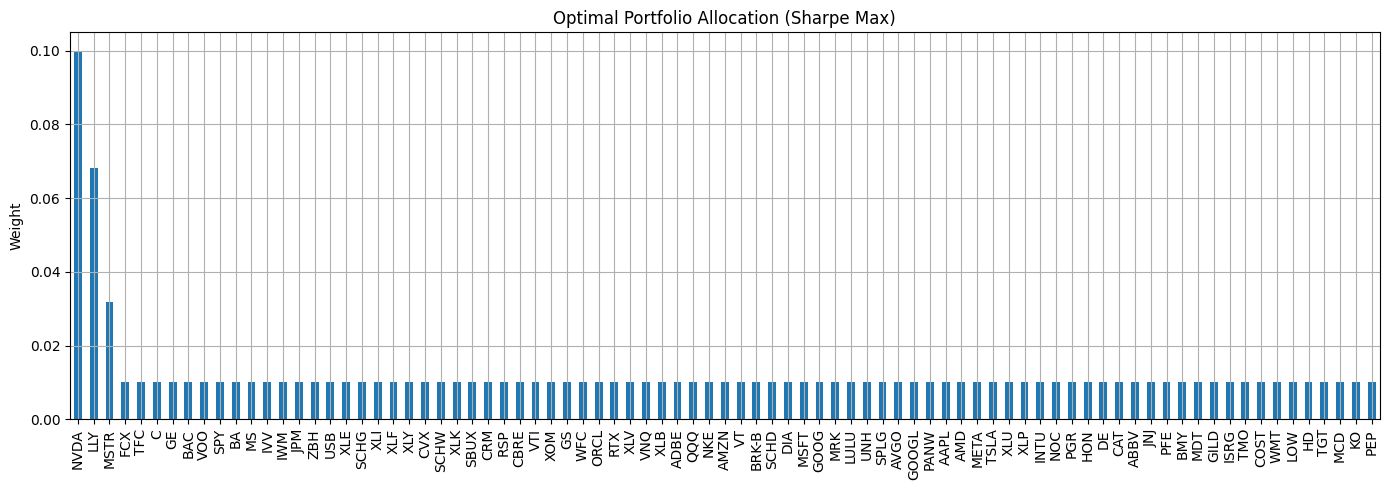


🔁 Backtesting against SPY...


C:\Users\chris\AppData\Local\Temp\ipykernel_5620\2054415565.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\chris\OneDrive\Desktop\PortfolioOptimization_V0.1\venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


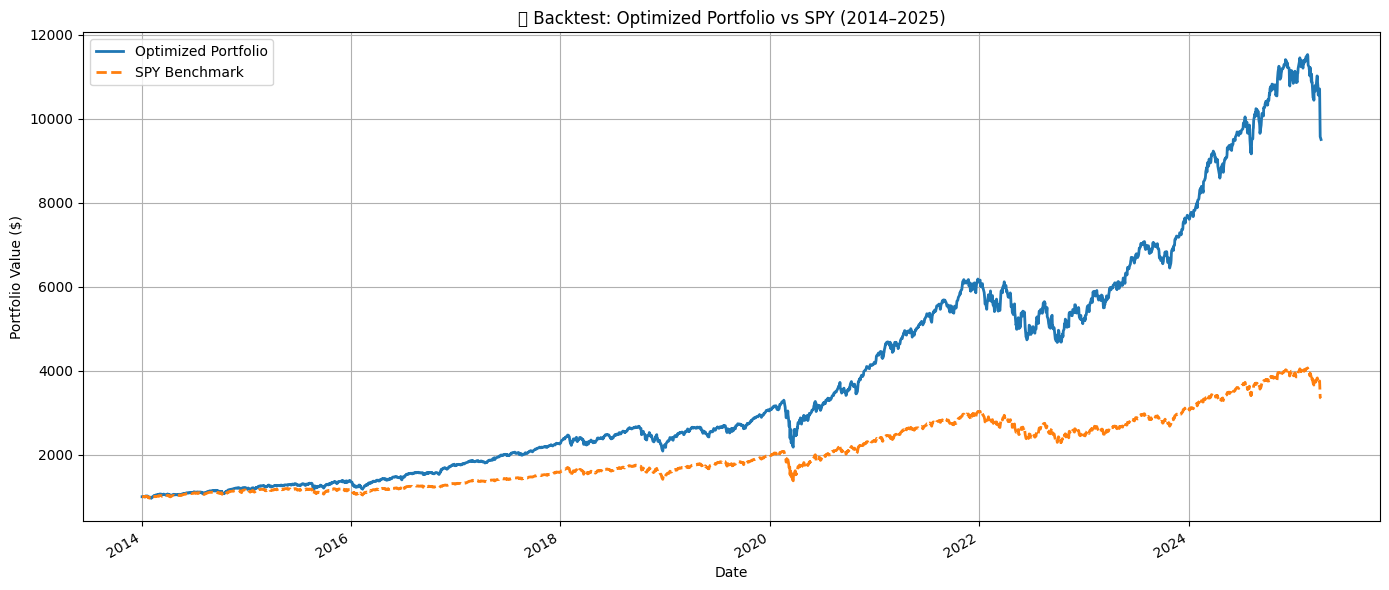


🔮 Forecasting future performance (5 years)...


C:\Users\chris\AppData\Local\Temp\ipykernel_5620\2054415565.py:129: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\chris\OneDrive\Desktop\PortfolioOptimization_V0.1\venv310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


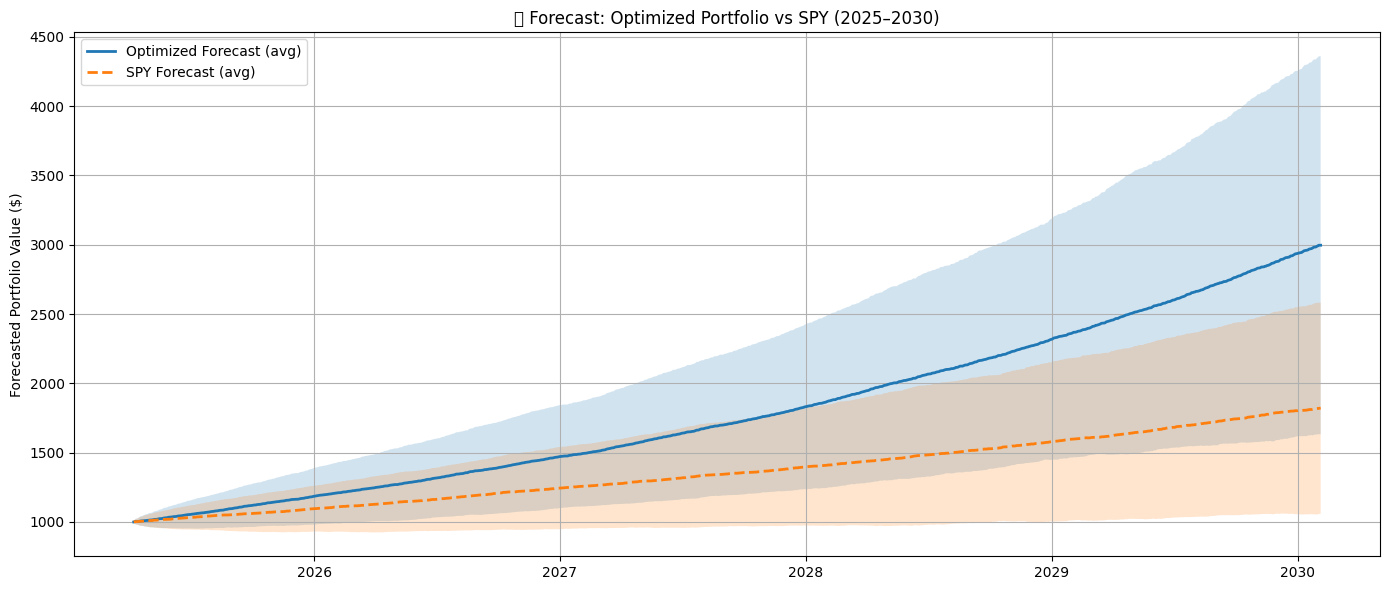

In [4]:
# 📦 Imports
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ✅ 100-Ticker Portfolio (including your university portfolio)
TICKERS = [
    "SCHD", "SWPPX", "SCHG", "QQQM", "PLTR", "MSTR", "SOFI", "MSFT", "BRK-B", "GOOG", "JPM", "MRK", "LULU", "UNH",
    "QQQ", "VTI", "SPY", "IVV", "DIA", "IWM", "VT", "VOO", "SPLG", "RSP",
    "XLF", "XLK", "XLY", "XLP", "XLV", "XLE", "XLU", "XLI", "XLB", "VNQ",
    "AAPL", "NVDA", "AMD", "META", "TSLA", "AMZN", "CRM", "GOOGL", "ORCL", "AVGO",
    "ADBE", "SNOW", "SHOP", "INTU", "PANW", "ZS", "NET", "COIN", "DOCU",
    "BAC", "WFC", "GS", "MS", "C", "TFC", "USB", "SCHW", "PGR", "CBRE",
    "BA", "CAT", "DE", "HON", "GE", "NOC", "RTX", "XOM", "CVX", "FCX",
    "PFE", "JNJ", "ABBV", "LLY", "BMY", "ZBH", "ISRG", "TMO", "MDT", "GILD",
    "WMT", "COST", "HD", "LOW", "TGT", "SBUX", "MCD", "KO", "PEP", "NKE"
]

# 📥 Download data (10+ years)
print("⏳ Downloading data...")
data = yf.download(TICKERS + ["SPY"], start="2014-01-01", end="2025-04-30", group_by='ticker', auto_adjust=True)

# 📊 Extract adjusted close
adj_close = pd.DataFrame()
for ticker in TICKERS:
    try:
        adj_close[ticker] = data[ticker]["Close"]
    except:
        continue
adj_close = adj_close.dropna(axis=1)

# 💹 Daily returns
returns = adj_close.pct_change().dropna()
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# ⚙️ Portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    ret = np.dot(weights, mean_returns)
    std = np.sqrt(weights.T @ cov_matrix @ weights)
    return ret, std

def negative_sharpe(weights, mean_returns, cov_matrix, rf=0.02):
    ret, std = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(ret - rf) / std

# 🎯 Constraints and bounds
num_assets = len(mean_returns)
init_guess = np.ones(num_assets) / num_assets
bounds = tuple((0.01, 0.10) for _ in range(num_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# 🚀 Run optimization
print("🚀 Optimizing portfolio...")
opt = minimize(negative_sharpe, init_guess,
               args=(mean_returns, cov_matrix),
               method='SLSQP', bounds=bounds, constraints=constraints)

# ✅ Optimal weights
opt_weights = pd.Series(opt.x, index=mean_returns.index)
opt_weights = opt_weights[opt_weights > 0.005].sort_values(ascending=False)
print("\n✅ Optimal Portfolio Weights:")
print(opt_weights.round(4))

# 📊 Allocation bar chart
opt_weights.plot(kind='bar', figsize=(14, 5), title="Optimal Portfolio Allocation (Sharpe Max)")
plt.ylabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 Backtest vs SPY
print("\n🔁 Backtesting against SPY...")
portfolio_returns = (returns[opt_weights.index] @ opt_weights).dropna()
spy_returns = data['SPY']['Close'].pct_change().reindex(portfolio_returns.index).dropna()

initial_value = 1000
portfolio_value = (1 + portfolio_returns).cumprod() * initial_value
spy_value = (1 + spy_returns).cumprod() * initial_value

plt.figure(figsize=(14, 6))
portfolio_value.plot(label="Optimized Portfolio", linewidth=2)
spy_value.plot(label="SPY Benchmark", linestyle="--", linewidth=2)
plt.title("📈 Backtest: Optimized Portfolio vs SPY (2014–2025)")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 🔮 Forecast future performance with average path + uncertainty
print("\n🔮 Forecasting future performance (5 years)...")
days = 252 * 5
simulations = 1000
np.random.seed(42)

mu_opt = portfolio_returns.mean()
sigma_opt = portfolio_returns.std()
mu_spy = spy_returns.mean()
sigma_spy = spy_returns.std()

opt_paths = np.zeros((days, simulations))
spy_paths = np.zeros((days, simulations))
opt_paths[0] = 1000
spy_paths[0] = 1000

for t in range(1, days):
    opt_paths[t] = opt_paths[t - 1] * np.exp((mu_opt - 0.5 * sigma_opt**2) + sigma_opt * np.random.normal(0, 1, simulations))
    spy_paths[t] = spy_paths[t - 1] * np.exp((mu_spy - 0.5 * sigma_spy**2) + sigma_spy * np.random.normal(0, 1, simulations))

forecast_index = pd.date_range(start=portfolio_value.index[-1] + pd.Timedelta(days=1), periods=days, freq='B')
opt_mean = opt_paths.mean(axis=1)
spy_mean = spy_paths.mean(axis=1)

opt_std = opt_paths.std(axis=1)
spy_std = spy_paths.std(axis=1)

plt.figure(figsize=(14, 6))
plt.plot(forecast_index, opt_mean, label="Optimized Forecast (avg)", linewidth=2)
plt.fill_between(forecast_index, opt_mean - opt_std, opt_mean + opt_std, alpha=0.2)
plt.plot(forecast_index, spy_mean, label="SPY Forecast (avg)", linewidth=2, linestyle='--')
plt.fill_between(forecast_index, spy_mean - spy_std, spy_mean + spy_std, alpha=0.2)
plt.title("🔮 Forecast: Optimized Portfolio vs SPY (2025–2030)")
plt.ylabel("Forecasted Portfolio Value ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
